# Advanced Python Tutorial: Time Series Forecasting with GluonTS

Name: John Hodge

Date: 06/06/2024

## Introduction

Time series forecasting is a crucial task in various domains, including finance, economics, meteorology, and many others. It involves predicting future values of a variable based on its historical data and other relevant factors. Accurate forecasting can provide valuable insights and support informed decision-making processes.

Traditional time series forecasting methods, such as ARIMA and exponential smoothing, have been widely used for decades. However, with the advent of deep learning and the increasing availability of large datasets, more advanced techniques have emerged, offering improved forecasting accuracy and the ability to capture complex patterns in time series data.

One such advanced technique is the use of deep learning models for time series forecasting. Deep learning models, particularly recurrent neural networks (RNNs) and their variants like long short-term memory (LSTM) and gated recurrent units (GRU), have shown remarkable performance in capturing temporal dependencies and nonlinear patterns in time series data.

In this tutorial, we'll explore time series forecasting using GluonTS, a powerful Python library built on top of Apache MXNet and PyTorch. GluonTS provides a range of deep learning models and tools specifically designed for time series analysis, including models like DeepAR and PatchTST.

DeepAR is a deep learning model that combines the strengths of autoregressive models and RNNs. It uses an RNN to capture the temporal dependencies in the data and an autoregressive component to model the distribution of future values. DeepAR has shown excellent performance in various time series forecasting tasks and can handle complex patterns and seasonality.

PatchTST, on the other hand, is a model designed for long-range forecasting. It combines a convolutional neural network (CNN) with a self-attention mechanism to capture long-term dependencies and patterns in the data. PatchTST has proven to be effective for forecasting tasks that require predicting values over an extended period.

Throughout this tutorial, we'll guide you through the process of loading and preprocessing time series data, splitting it into training and test sets, training deep learning models like DeepAR and PatchTST using GluonTS, and visualizing the forecasts. We'll also discuss the strengths and limitations of these models and provide insights into when to use each one.

By the end of this tutorial, you'll have a solid understanding of time series forecasting with deep learning models in GluonTS and be equipped with the knowledge and skills to tackle real-world forecasting problems effectively.

<!-- This tutorial will guide you through time series forecasting using the GluonTS library, a powerful Python library built on top of Apache MXNet and PyTorch. We'll cover loading and preprocessing time series data, splitting it into training and test sets, training deep learning models like DeepAR and PatchTST, and visualizing the forecasts.

GluonTS provides a range of models and tools for working with time series data, including support for hierarchical and multi-variate time series, anomaly detection, and more. -->


Learn more: [GluonTS](https://github.com/awslabs/gluonts/tree/dev)

## Outline

This tutorial covers the following key aspects of time series forecasting with GluonTS:

    1. Data Preparation: Loading and preprocessing time series data into the PandasDataset format required by GluonTS.
    2. Data Splitting: Splitting the time series data into training and test sets using the split function.
    3. Model Training and Forecasting: Training deep learning models like DeepAR and PatchTST, and making forecasts on the test data.
    4. Visualization: Visualizing the forecasts alongside the true values using Matplotlib.
    5. Multiple Models: Demonstrating the use of different models like DeepAR and PatchTST, which are suitable for different forecasting scenarios.
    6. Conclusion and Further Learning: Encouraging readers to explore the GluonTS documentation and examples for more advanced features and models.

## Install GluonTS with PyTorch backend

You can install GluonTS with PyTorch backend using pip:

In [ ]:
!pip install "gluonts[torch]"

## Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator, PatchTSTEstimator

## Data Preparation

Let's start by loading a time series dataset from a CSV file into a PandasDataset, which is a data format required by GluonTS.

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 1

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 5.67375 (best 5.67375), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 5.67375 (best 5.67375), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 4.75507 (best 4.75507), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 4.75507 (best 4.75507), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 4.55248 (best 4.55248), saving model to '/content/lightning_logs/version_1/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: '

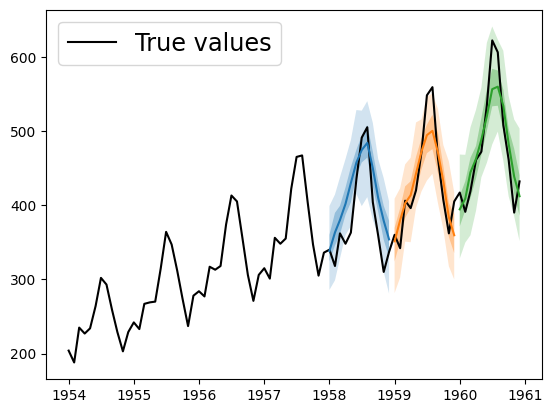

In [ ]:
# Load data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)

In [ ]:
dataset = PandasDataset(df, target="#Passengers")

## Data Splitting

Next, we'll split the data into training and test sets using the `split` function from GluonTS.

In [ ]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

## Train the DeepAR model and make predictions

In [ ]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

### Make predictions

In [ ]:
forecasts = list(model.predict(test_data.input))

## Visualization

Finally, we'll visualize the forecasts alongside the true values.

In [ ]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

## PatchTST Model

GluonTS also provides the PatchTST model, which is designed for long-range forecasting. Let's train and evaluate this model as well.

Source: https://ts.gluon.ai/stable/api/gluonts/gluonts.torch.model.patch_tst.html

In [ ]:
# Train the model and make predictions
model = PatchTSTEstimator(
    prediction_length=12, patch_len=16, trainer_kwargs={"max_epochs": 5}
).train(training_data)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type          | Params
----------------------------------------
0 | model | PatchTSTModel | 211 K 
----------------------------------------
210 K     Trainable params
480       Non-trainable params
211 K     Total params
0.845     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summ

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 5.37627 (best 5.37627), saving model to '/content/lightning_logs/version_2/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 5.37627 (best 5.37627), saving model to '/content/lightning_logs/version_2/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 4.83060 (best 4.83060), saving model to '/content/lightning_logs/version_2/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 4.83060 (best 4.83060), saving model to '/content/lightning_logs/version_2/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 4.56299 (best 4.56299), saving model to '/content/lightning_logs/version_2/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: '

In [ ]:
forecasts = list(model.predict(test_data.input))

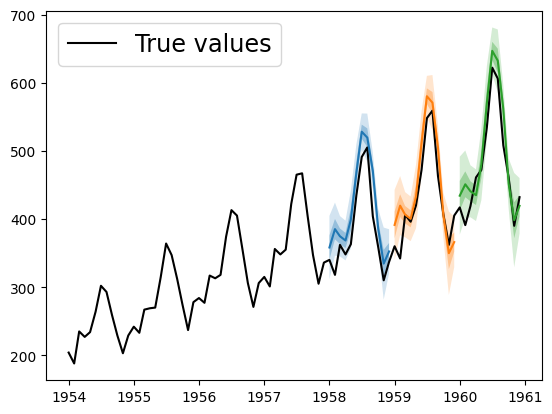

In [ ]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

## Conclusion

In this tutorial, we've covered the basics of time series forecasting using the GluonTS library in Python. We've learned how to load and preprocess time series data, split it into training and test sets, train deep learning models like DeepAR and PatchTST, and visualize the forecasts.

GluonTS provides many more features and models for time series analysis, including support for hierarchical and multi-variate time series, anomaly detection, and more. I encourage you to explore the GluonTS documentation and examples to further deepen your understanding of this powerful library.

## References



*   [GluonTS](https://github.com/awslabs/gluonts/tree/dev)
*   [A Survey of Deep Learning and Foundation Models for Time Series Forecasting
](https://arxiv.org/abs/2401.13912)
*   [A Time Series is Worth 64 Words: Long-term Forecasting with Transformers](https://arxiv.org/abs/2401.13912)
*   [DeepAR: Probabilistic Forecasting with Autoregressive Recurrent Networks](https://arxiv.org/abs/1704.04110)
*   [AWS SageMaker: DeepAR Forecasting Algorithm](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html)

